# Chapter 4

## Exercise 13

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
import seaborn as sns
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
Weekly=load_data("Weekly")

In [3]:
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### (a)

First step to look for patterns is to draw statistical description of data. For this we can use the method describe() as follows:

In [4]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [7]:
Weekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Thanks to the correlation matrix, the only predictible trend is between Volume and Year. But let's draw graphs as the question asks.

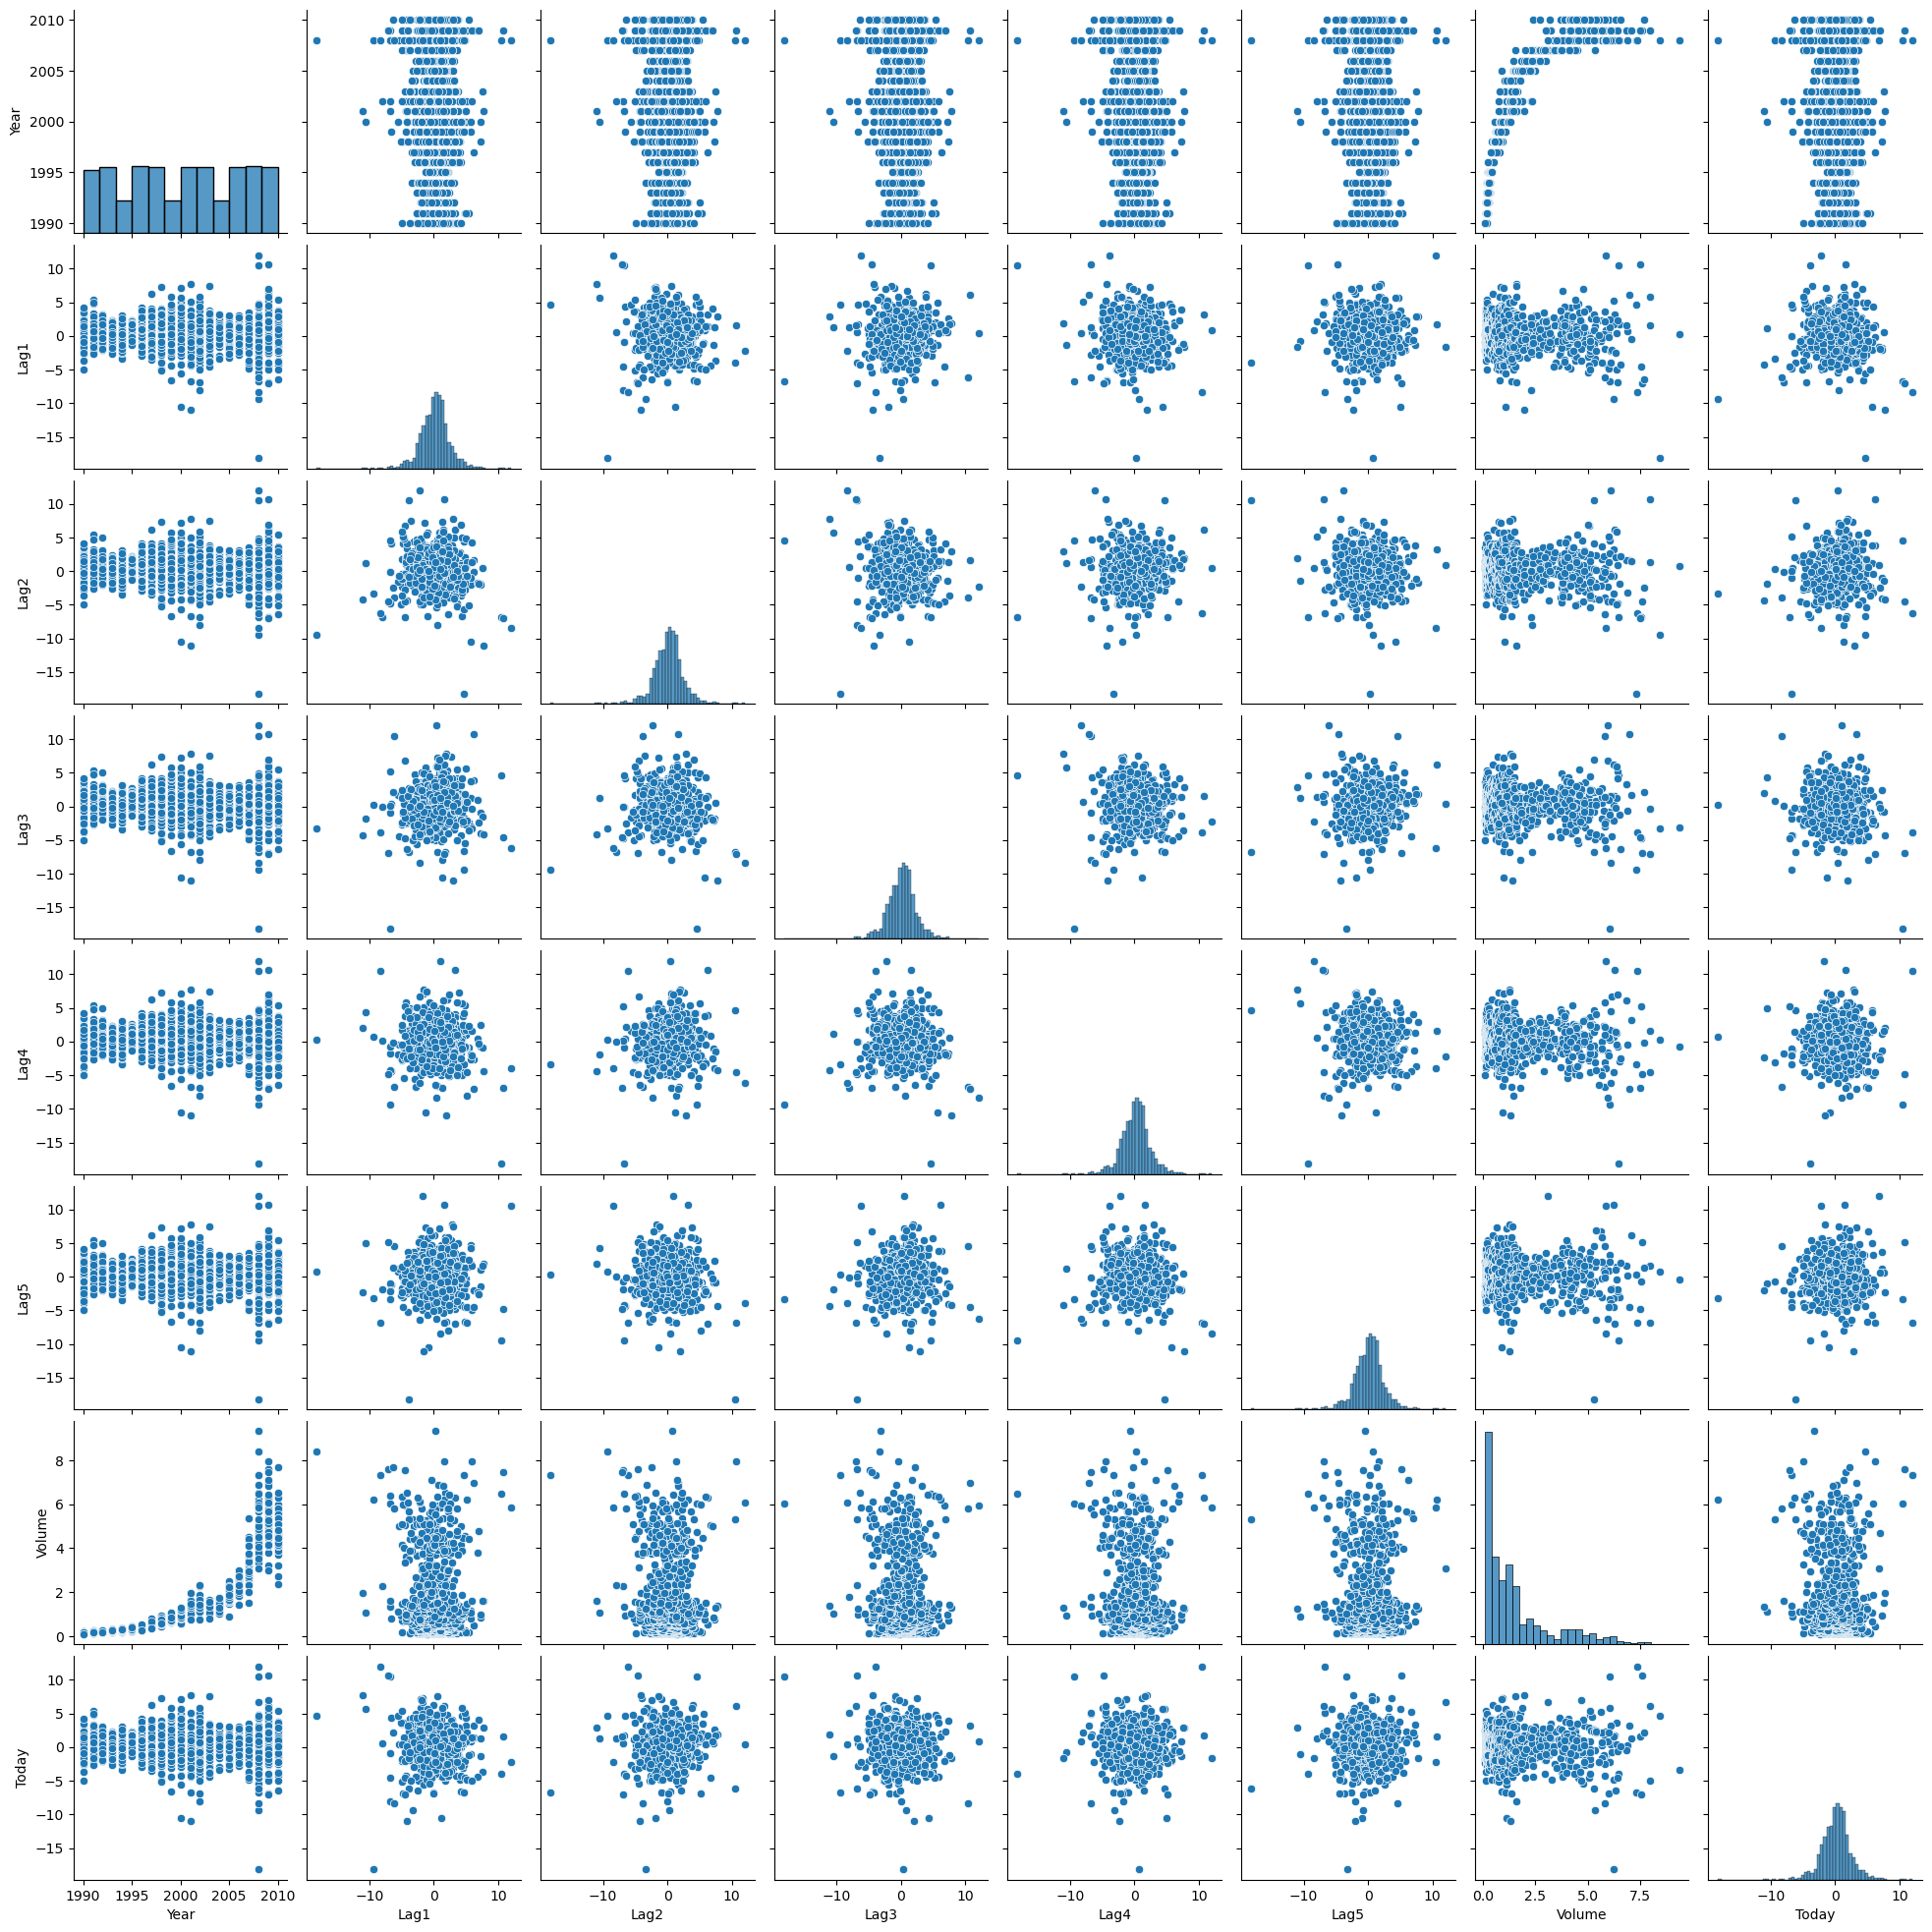

In [8]:
sns.pairplot(Weekly);

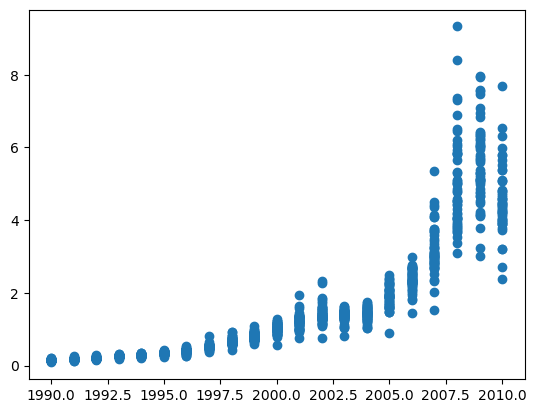

In [9]:
plt.scatter(Weekly['Year'],Weekly['Volume']);

Given the plots shown above, the only visible pattern is the one which relates Year to Volume

### (b)

In [10]:
allvars=Weekly.columns.drop(['Today','Direction','Year'])
design=MS(allvars)
X=design.fit_transform(Weekly)
y=Weekly.Direction=='Up'
glm=sm.GLM(y,X,family=sm.families.Binomial())
res=glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Sat, 09 Sep 2023   Deviance:                       1486.4
Time:                        11:01:53   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Only Lag2 seems to be statistically significant.

### (c)

In [13]:
probs=res.predict()
labels=np.array(['Down']*1089)
labels[probs>0.5]="Up"

In [14]:
ISLP.confusion_table(labels,Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [15]:
(557+54)/(54+557+430+48)

0.5610651974288338

The accuracy rate is 56%, slightly better than random guessing. Given that we chose that 'up' is the positive direction, the error rate is mainly due to false positive classification. Which means that 430 stocks are predicted to go up by the model while they truly go down.  

### (d)

In [15]:
# Selecting the asked period and the corresponding training set with Lag2 as the only predictor
train=(Weekly.Year<2009)
W_train=Weekly.loc[train].Lag2
W_test=Weekly.loc[~train].Lag2
W_test.shape

(104,)

In [16]:
#Refitting the new model
X_train, X_test = X.loc[train].Lag2, X.loc[~train].Lag2
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
#Designing the probabilities based on the training set
probs = results.predict(exog=X_test)

X_t=np.array(X_train)
XX=X_t.reshape(np.shape(X_t)[0],1)
X_ts=np.array(X_test)
Xts=X_ts.reshape(np.shape(X_ts)[0],1)

In [17]:
#Preparing the test set to compare with the corresponding training set in the confusion matrix
D=Weekly.Direction
Test_set=D.loc[~train]
Train_set=D.loc[train]
#Converting the probs matrix to a matrix filled with direction values
labels=np.array(['Down']*104)
labels[probs>0.5]='Up'
C=ISLP.confusion_table(labels,Test_set)
Train_s=np.array(Train_set)
TT=Train_s.reshape(np.shape(Train_set)[0],1)
Test_s=np.array(Test_set)
TS=Test_s.reshape(np.shape(Test_s)[0],1)
TS.shape

(104, 1)

In [18]:
C

Truth,Down,Up
Predicted,,
Down,20,24
Up,23,37


In [19]:
(20+37)/104

0.5480769230769231

The rate of correct predictions on the held out data is around 55%. 

### (e)

In [19]:
lda=LDA(store_covariance=True)
lda.fit(XX, Train_set)

LinearDiscriminantAnalysis(store_covariance=True)

In [20]:
lda_pred=lda.predict(Xts)
lda_predm=np.array(lda_pred)
lda_predm1=lda_predm.reshape(np.shape(lda_predm)[0],1)
ISLP.confusion_table(lda_predm1,TS)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [21]:
(9+56)/104

0.625

LDA performs better than logistic regression since Lag2 seems to follow a normal distribution from the previous correlation plot.

### (f)

In [22]:
qda=QDA(store_covariance=True)
qda.fit(XX, Train_set)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [23]:
qda_pred=qda.predict(Xts)
qda_predm=np.array(qda_pred)
qda_predm1=qda_predm.reshape(np.shape(lda_predm)[0],1)
ISLP.confusion_table(qda_predm1,TS)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [55]:
61/(61+43)

0.5865384615384616

Fraction of correct answers for QDA is around 59%, which means that it is lower than LDA but better than logistic regression. The QDA is better here than logistic regression for the same reason as for the LDA. However, LDA gives a better prediction than QDA since there are no signs of interactions among predictors.

### (g)

In [24]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(XX, Train_set)

KNeighborsClassifier(n_neighbors=1)

In [25]:
knn1_pred=knn1.predict(Xts)
knn1_predm=np.array(knn1_pred)
knn1_predm1=knn1_predm.reshape(np.shape(knn1_predm)[0],1)
ISLP.confusion_table(knn1_predm1,TS)

Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


In [26]:
(22+30)/104

0.5

Since the LDA outperforms QDA we can already expect that KNN will perform poorly. The decision boundary
should be linear. Furthermore, the rate giving the number of observations over the number of predictors is around 17, which is not large enough to justify such a non parametric technique.

### (h)

In [27]:
NB = GaussianNB()
NB.fit(XX, Train_set)

GaussianNB()

In [28]:
NB_pred=NB.predict(Xts)
NB_predm=np.array(NB_pred)
NB_predm1=NB_predm.reshape(np.shape(NB_predm)[0],1)
ISLP.confusion_table(NB_predm1,TS)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [29]:
61/104

0.5865384615384616

### (i)

LDA appears to give the best results on the data set.

## Exercise 14

### (a)

In [31]:
Auto=load_data("Auto")

In [32]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [33]:
mpg01=np.where(Auto["mpg"]>Auto["mpg"].median(),1,0)

In [35]:
Auto['mpg01']=mpg01

### (b)

In [37]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


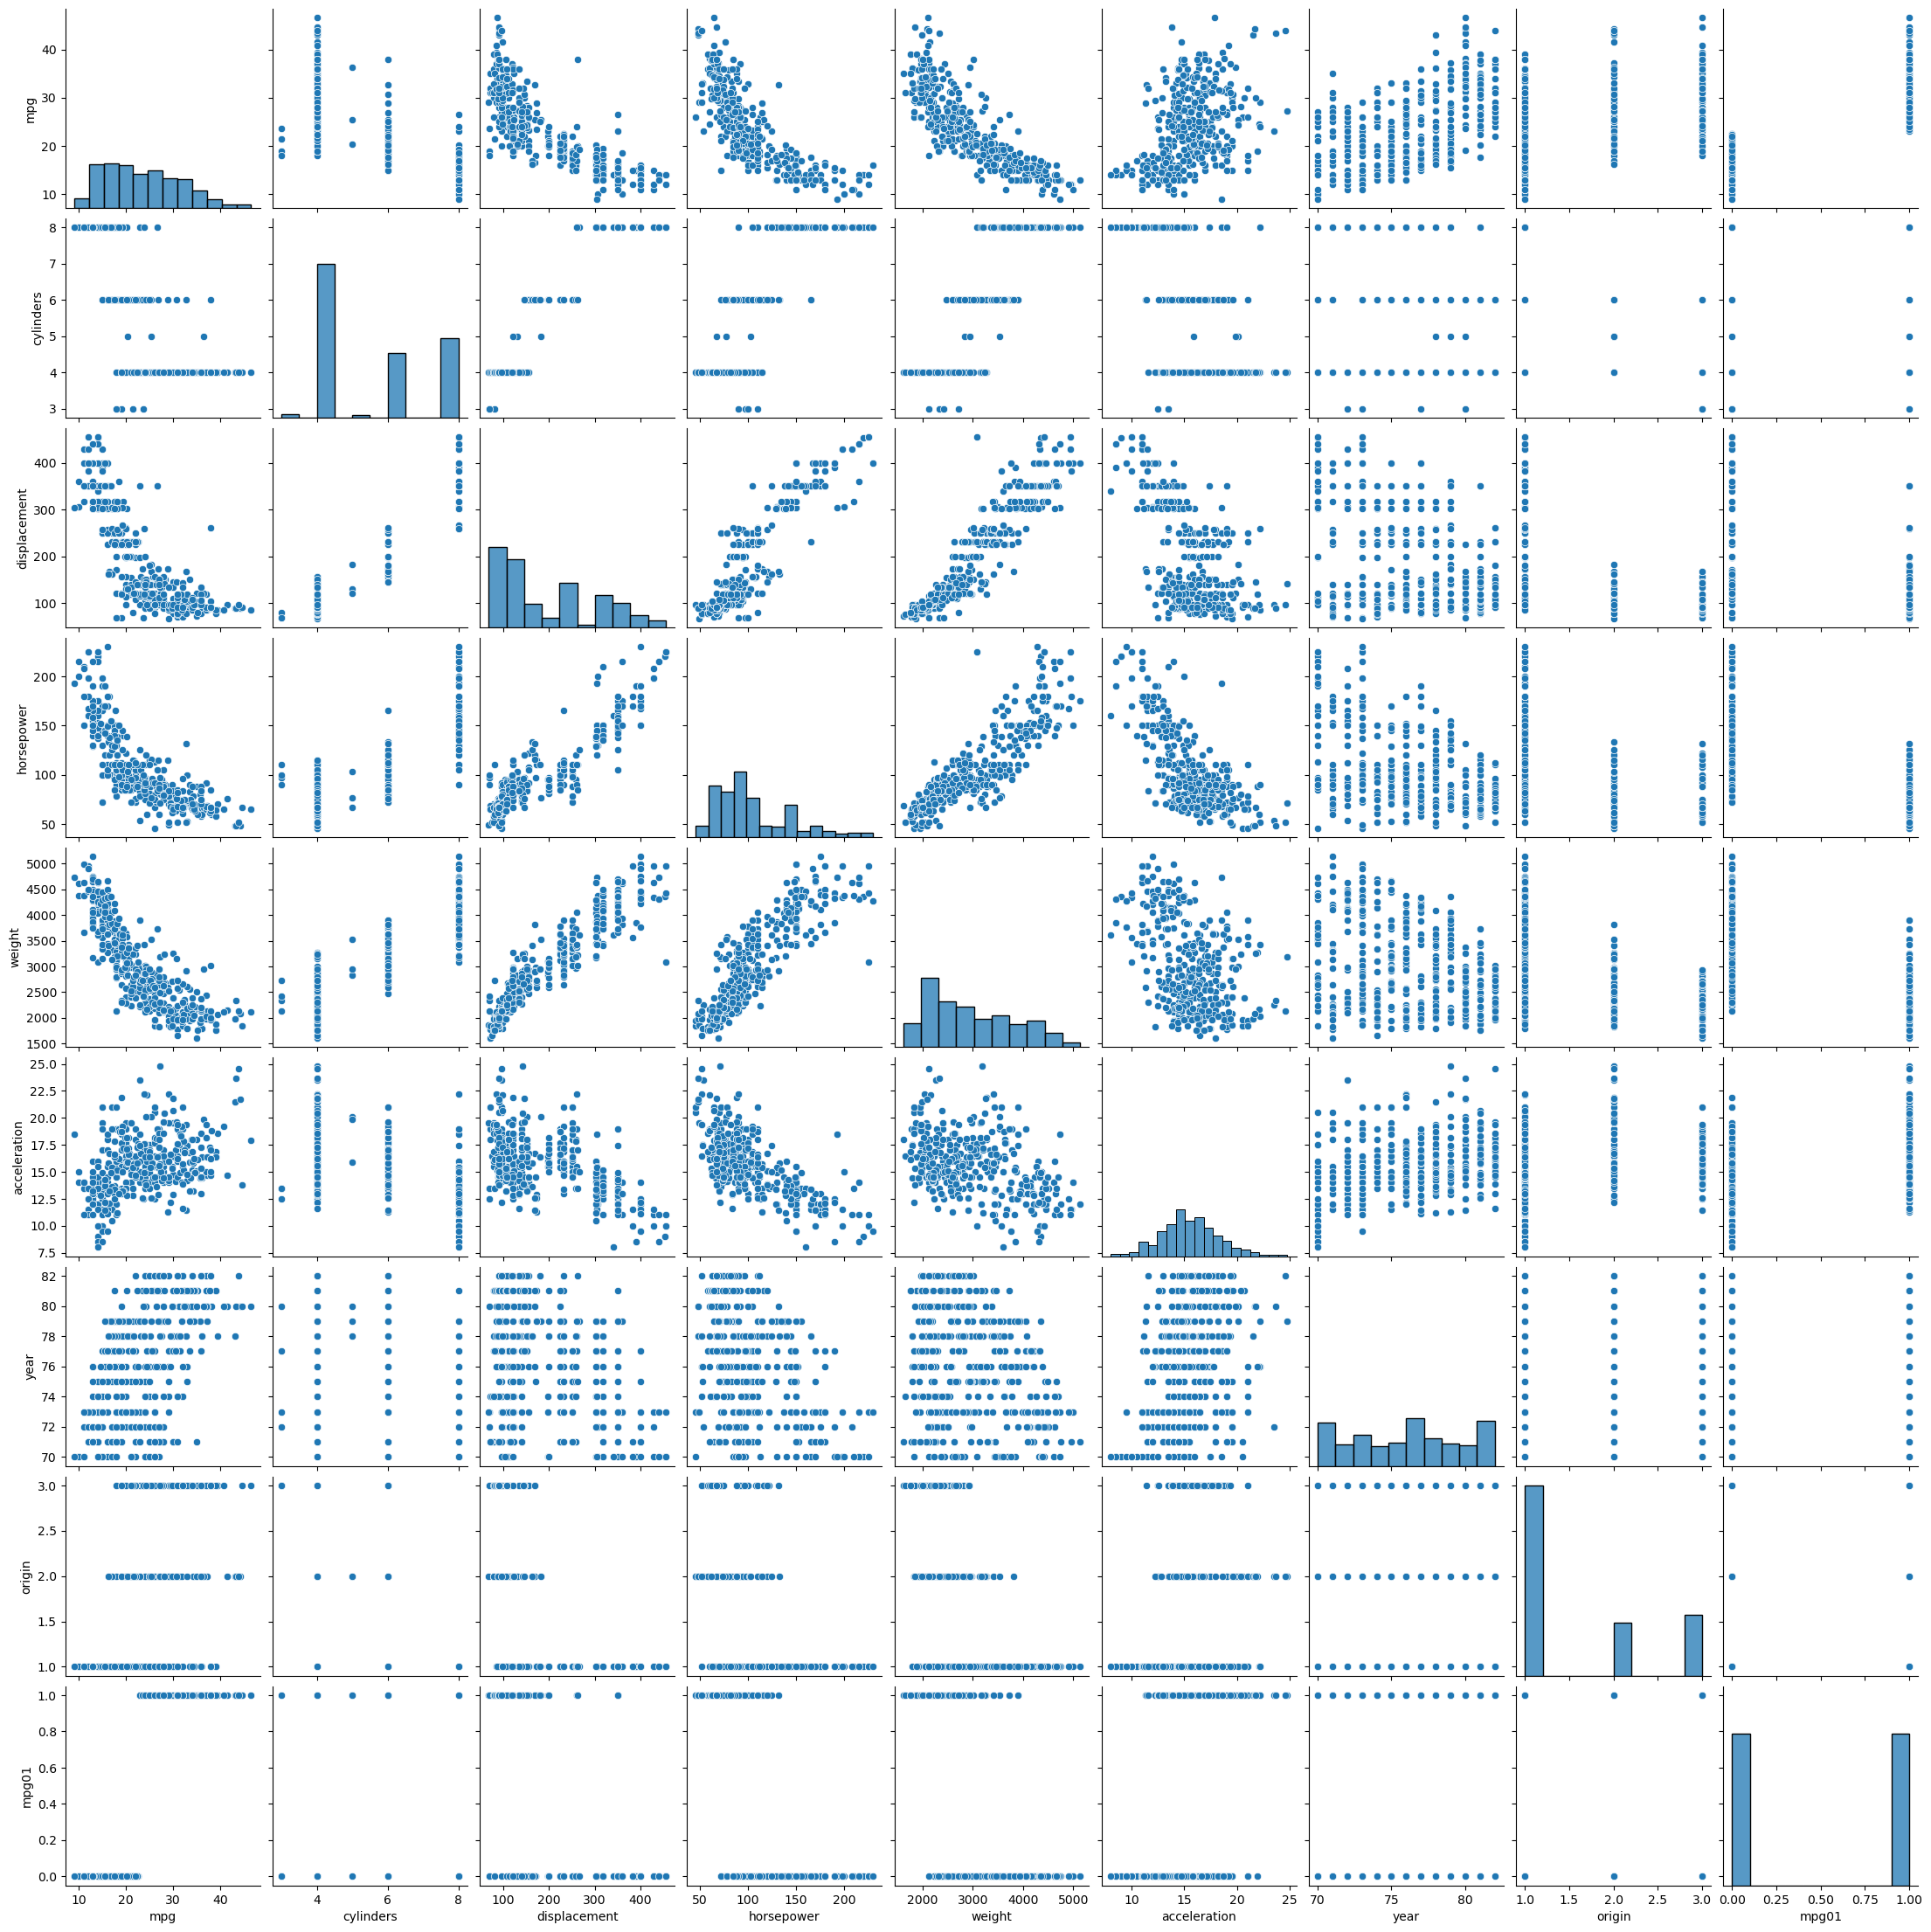

In [38]:
sns.pairplot(Auto);

From the graph and the correlation matrix we can conclude that there may be a significant correlation among mpg01, displacement, weight and cylinders.

In [39]:
x=Auto[['weight','displacement','cylinders']].values
#the values attribute is used to convert x from a dataframe object to an array
y=Auto['mpg01'].values


### (c)

In [40]:
(X_train,X_test,y_train,y_test) = train_test_split(x,y,random_state=1)

### (d)

In [41]:
lda=LDA(store_covariance=True)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [43]:
lda_pred=lda.predict(X_test)
ISLP.confusion_table(lda_pred,y_test)

Truth,0,1
Predicted,,
0,49,2
1,5,42


In [81]:
(49+42)/(49+42+5+2)

0.9285714285714286

In [45]:
LDA_test_err=1-accuracy_score(y_test, lda.predict(X_test))
LDA_test_err

0.0714285714285714

The test error obtained for the LDA model is 7%.

### (e)

In [46]:
qda=QDA(store_covariance=True)
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [48]:
qda_pred=qda.predict(X_test)
QDA_test_err=1-accuracy_score(y_test, qda.predict(X_test))
QDA_test_err

0.061224489795918324

The test error obtained for the LDA model is 6%.

### (f)

In [49]:
lr=LogisticRegression()
result=lr.fit(X_train,y_train)
lr_test_error=1-accuracy_score(y_test, lr.predict(X_test))
lr_test_error

0.061224489795918324

The test error obtained for the logistic regression model is 6%.

### (g)

In [50]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [52]:
NB_pred=NB.predict(X_test)
NB_test_error=1-accuracy_score(y_test, NB_pred)
NB_test_error

0.0714285714285714

The test error obtained for Naive Bayes model is 7%.

### (h)

In [99]:
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print('K={:3}, accuracy = {:.4f}'.format(k, acc))

K=  1, accuracy = 0.8469
K=  2, accuracy = 0.8776
K=  3, accuracy = 0.8673
K=  4, accuracy = 0.8776
K=  5, accuracy = 0.8571
K=  6, accuracy = 0.8878
K=  7, accuracy = 0.8776
K=  8, accuracy = 0.9082
K=  9, accuracy = 0.8980
K= 10, accuracy = 0.8878
K= 11, accuracy = 0.9082
K= 12, accuracy = 0.9082
K= 13, accuracy = 0.9184
K= 14, accuracy = 0.9082
K= 15, accuracy = 0.8980
K= 16, accuracy = 0.8980
K= 17, accuracy = 0.8878
K= 18, accuracy = 0.9184
K= 19, accuracy = 0.9082
K= 20, accuracy = 0.9184
K= 21, accuracy = 0.9082
K= 22, accuracy = 0.9082
K= 23, accuracy = 0.9082
K= 24, accuracy = 0.9184
K= 25, accuracy = 0.9082
K= 26, accuracy = 0.9184
K= 27, accuracy = 0.9184
K= 28, accuracy = 0.9184
K= 29, accuracy = 0.9184
K= 30, accuracy = 0.9184
K= 31, accuracy = 0.9184
K= 32, accuracy = 0.9184
K= 33, accuracy = 0.9082
K= 34, accuracy = 0.9082
K= 35, accuracy = 0.8980
K= 36, accuracy = 0.9082
K= 37, accuracy = 0.8980
K= 38, accuracy = 0.8980
K= 39, accuracy = 0.8980
K= 40, accuracy = 0.8980


The value of 13 for K seems to give the best result for the KNN model.

## Exercise 15

### (a)

In [53]:
def Power():
    print(2**3)

### (b)

In [54]:
def Power2(x,a):
    print(x**a)

### (c)

In [56]:
Power2(10,3)

2248091

In [57]:
Power2(8,17)


2251799813685248

In [58]:
Power2(131,3)

2248091

### (d)

In [59]:
def Power3(x,a):
    return x**a

### (e)

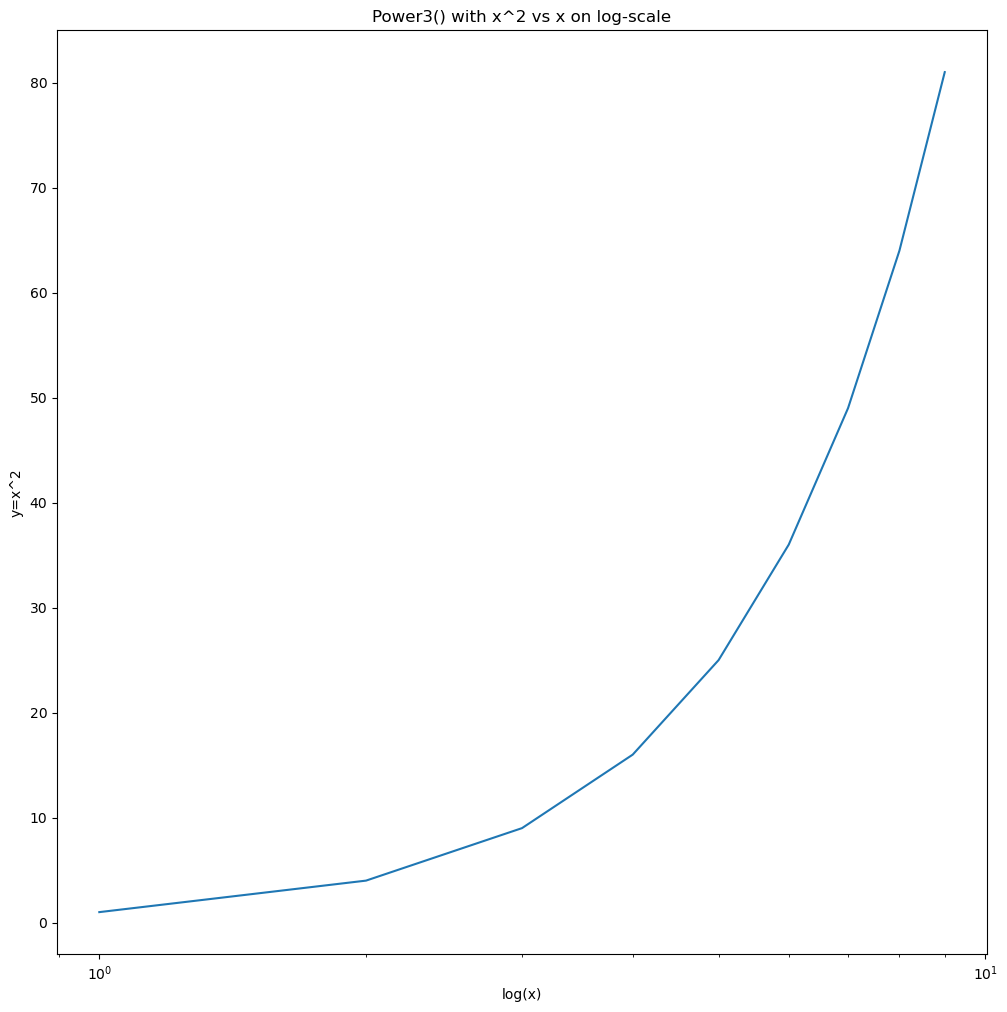

In [63]:
x = np.arange(1,10)
y = Power3(x,2)
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xscale('log')
ax.set_title('Power3() with x^2 vs x on log-scale')
ax.set_xlabel('log(x)')
ax.set_ylabel('y=x^2')
ax.plot(x,y);

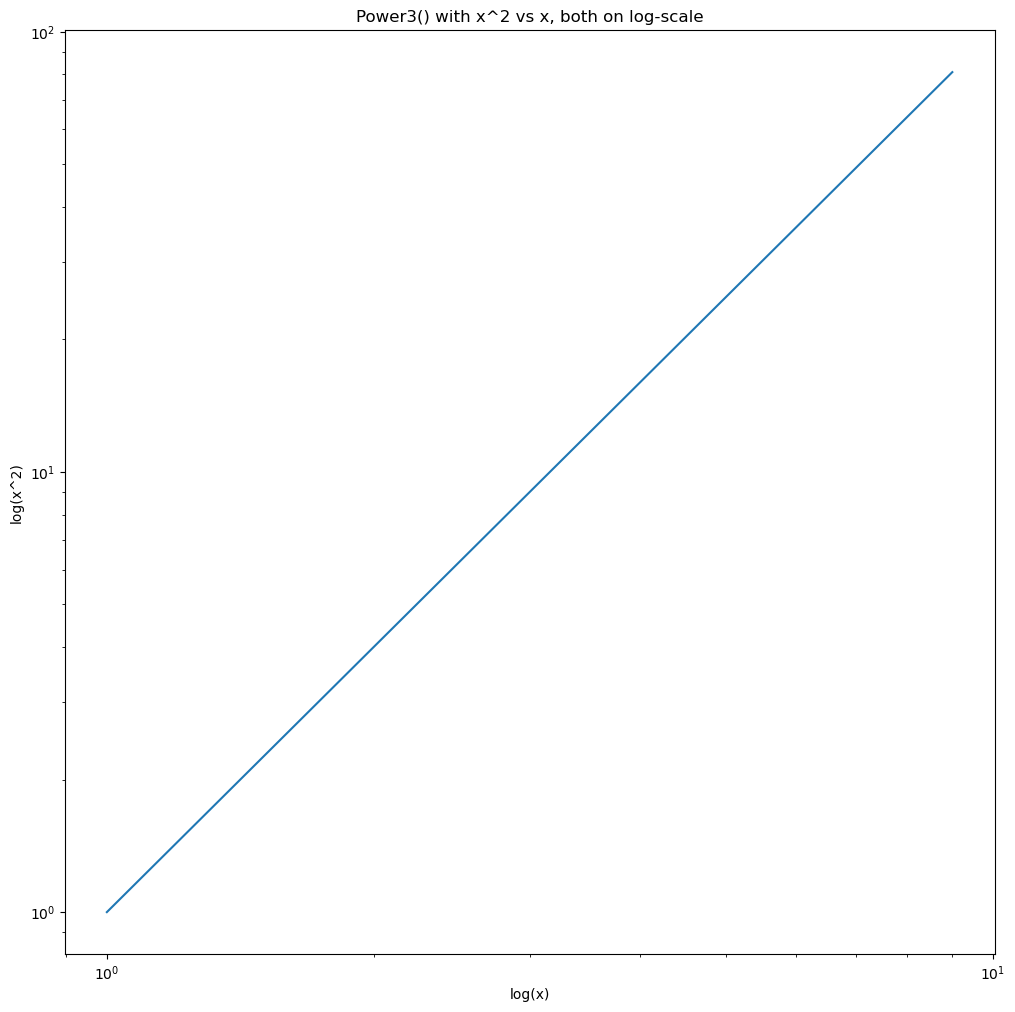

In [64]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Power3() with x^2 vs x, both on log-scale')
ax.set_xlabel('log(x)')
ax.set_ylabel('log(x^2)')
ax.plot(x,y);

### (f)

In [65]:
def PlotPower(x,a,log=''):
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('x^%.0f vs x' %a)
    if log=='xy':
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title('x^%.0f vs x, both on log-scale'%a)
        ax.set_xlabel('log(x)')
        ax.set_ylabel('log(x^%.0f)'%a)
    if log=='x':
        ax.set_xscale('log')
        ax.set_title('x^%.0f vs log(x)'%a)
        ax.set_xlabel('log(x)')
        ax.set_ylabel('x^%.0f'%a)
    if log=='y':
        ax.set_yscale('log')
        ax.set_title('log(x^%.0f) vs x'%a)
        ax.set_xlabel('x')
        ax.set_ylabel('log(x^%.0f)'%a)  
    ax.plot(x,y);

## Exercise 16

In [66]:
Boston=load_data('Boston')

In [68]:
# Create a response variable and add it to the Boston data set
# 1 for crim_ab means that crime rate is above the median
crim_ab=np.where(Boston["crim"]>Boston["crim"].median(),1,0)
Boston['crim_ab']=crim_ab

In [74]:
Boston['crim_ab'].describe()

count    506.000000
mean       0.500000
std        0.500495
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: crim_ab, dtype: float64

In [75]:
Boston.corr(numeric_only=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim_ab
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741


Features age, dis, nox, rad, tax and indus seem to be correlated with crim_ab.

In [87]:
# Split data set into training and test data set
x=Boston[['indus','nox','age','dis','rad','tax']].values
#the values attribute is used to convert x from a dataframe object to an array
y=Boston['crim_ab'].values
(x_train,x_test,y_train,y_test)=train_test_split(x,y,random_state=1)

In [91]:
allvars=Boston[['indus','nox','age','dis','rad','tax']]
design=MS(allvars)
X=design.fit_transform(Boston)
Y=Boston.crim_ab==1
glm=sm.GLM(Y,X,family=sm.families.Binomial())
res=glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                crim_ab   No. Observations:                  506
Model:                            GLM   Df Residuals:                      499
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.38
Date:                Sat, 09 Sep 2023   Deviance:                       244.77
Time:                        14:41:36   Pearson chi2:                     294.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5945
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -24.5072      3.744     -6.545      0.000     -31.846     -17.168
indus         -0.0576      0.042     -1.360      0.174      -0.141       0.025
nox           42.0938      6.919      6.084      0.000      28.533      55.655
age            0.0138      0.009      1.582      0.114      -0.003       0.031
dis            0.2061      0.146      1.411      0.158      -0.080       0.492
rad            0.5982      0.116      5.159      0.000       0.371       0.825
tax           -0.0073      0.002     -3.072      0.002      -0.012      -0.003
==============================================================================
"""

In [95]:
probs=res.predict()
labels=np.array([0]*Boston.shape[0])
labels[probs>0.5]=1
ISLP.confusion_table(labels,Boston.crim_ab)

Truth,0,1
Predicted,,
0,225,40
1,28,213


In [97]:
(225+213)/(225+213+28+40)

0.8656126482213439

The fraction of correct answers for logistic regression is around 87%.

In [98]:
lda=LDA(store_covariance=True)
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [99]:
lda_pred=lda.predict(x_test)
ISLP.confusion_table(lda_pred,y_test)

Truth,0,1
Predicted,,
0,57,20
1,3,47


In [106]:
accuracy_score(y_test, lda.predict(x_test))

0.8188976377952756

The fraction of correct answers for LDA is around 82%.

In [107]:
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [108]:
NB_pred=NB.predict(x_test)
ISLP.confusion_table(NB_pred,y_test)

Truth,0,1
Predicted,,
0,55,19
1,5,48


In [109]:
accuracy_score(y_test, NB_pred)

0.8110236220472441

The fraction of correct answers for LDA is around 81%.

In [110]:
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    acc = accuracy_score(y_test, knn.predict(x_test))
    print('K={:3}, accuracy = {:.4f}'.format(k, acc))

K=  1, accuracy = 0.9370
K=  2, accuracy = 0.9213
K=  3, accuracy = 0.9213
K=  4, accuracy = 0.9134
K=  5, accuracy = 0.9055
K=  6, accuracy = 0.9134
K=  7, accuracy = 0.8819
K=  8, accuracy = 0.8819
K=  9, accuracy = 0.8819
K= 10, accuracy = 0.8740
K= 11, accuracy = 0.8819
K= 12, accuracy = 0.8819
K= 13, accuracy = 0.8819
K= 14, accuracy = 0.8583
K= 15, accuracy = 0.8583
K= 16, accuracy = 0.8425
K= 17, accuracy = 0.8346
K= 18, accuracy = 0.8425
K= 19, accuracy = 0.8189
K= 20, accuracy = 0.8189
K= 21, accuracy = 0.8189
K= 22, accuracy = 0.8189
K= 23, accuracy = 0.8189
K= 24, accuracy = 0.8189
K= 25, accuracy = 0.8189
K= 26, accuracy = 0.8189
K= 27, accuracy = 0.8189
K= 28, accuracy = 0.8189
K= 29, accuracy = 0.8110
K= 30, accuracy = 0.8110


Best K=1 with an accuracy score of 94%.

We conclude that KNN-1 is the best prediction model used for the subset of selected predictors.